# 케라스 CNN Fashion MNIST

#### module import

In [67]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [68]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [69]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [70]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [71]:
def build_model():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input],outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_1 = build_model()
model_1.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               3965056   
_________________________________________________________________
dense_19 (Dense)             (None, 64)              

### 모델 학습
- 런타임 GPU로 설정

In [72]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 3s 9ms/step - loss: 0.5148 - acc: 0.8167 - val_loss: 0.4097 - val_acc: 0.8530
Epoch 2/25
329/329 [==============================] - 3s 9ms/step - loss: 0.3562 - acc: 0.8708 - val_loss: 0.3614 - val_acc: 0.8660
Epoch 3/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2943 - acc: 0.8908 - val_loss: 0.3684 - val_acc: 0.8739
Epoch 4/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2499 - acc: 0.9067 - val_loss: 0.3759 - val_acc: 0.8737
Epoch 5/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2140 - acc: 0.9202 - val_loss: 0.3944 - val_acc: 0.8734
Epoch 6/25
329/329 [==============================] - 3s 9ms/step - loss: 0.1951 - acc: 0.9278 - val_loss: 0.4026 - val_acc: 0.8728
Epoch 7/25
329/329 [==============================] - 3s 9ms/step - loss: 0.1623 - acc: 0.9402 - val_loss: 0.4475 - val_acc: 0.8691
Epoch 8/25
329/329 [==============================] - 3s 9ms/step - loss: 0.

### 학습 결과 시각화

In [73]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

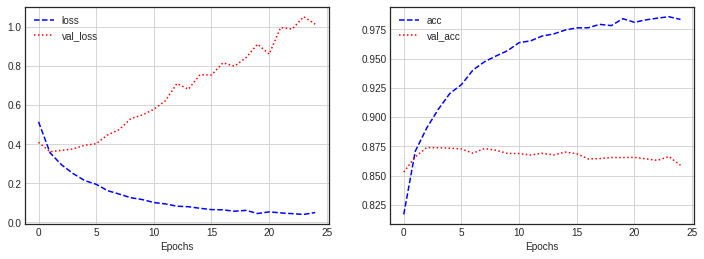

In [74]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'],'b--',label='loss')
plt.plot(hist_1.history['val_loss'],'r:',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'],'b--',label='acc')
plt.plot(hist_1.history['val_acc'],'r:',label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [75]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1214 - acc: 0.8496


[1.121416449546814, 0.8496000170707703]

### 모델 재구성
- 학습 파라미터의 수 비교

In [76]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input],outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_2 = build_model2()
model_2.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 64)        

### 모델 재학습

In [77]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 2s 5ms/step - loss: 0.9074 - acc: 0.6672 - val_loss: 0.5573 - val_acc: 0.7949
Epoch 2/25
329/329 [==============================] - 1s 4ms/step - loss: 0.5803 - acc: 0.7913 - val_loss: 0.4851 - val_acc: 0.8190
Epoch 3/25
329/329 [==============================] - 1s 4ms/step - loss: 0.5008 - acc: 0.8223 - val_loss: 0.4383 - val_acc: 0.8398
Epoch 4/25
329/329 [==============================] - 1s 4ms/step - loss: 0.4467 - acc: 0.8390 - val_loss: 0.4014 - val_acc: 0.8502
Epoch 5/25
329/329 [==============================] - 1s 4ms/step - loss: 0.4132 - acc: 0.8511 - val_loss: 0.3851 - val_acc: 0.8588
Epoch 6/25
329/329 [==============================] - 1s 4ms/step - loss: 0.3918 - acc: 0.8588 - val_loss: 0.3629 - val_acc: 0.8666
Epoch 7/25
329/329 [==============================] - 1s 4ms/step - loss: 0.3649 - acc: 0.8679 - val_loss: 0.3583 - val_acc: 0.8674
Epoch 8/25
329/329 [==============================] - 1s 4ms/step - loss: 0.

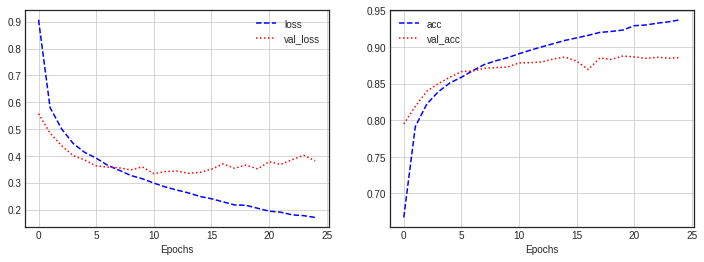

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'],'b--',label='loss')
plt.plot(hist_2.history['val_loss'],'r:',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'],'b--',label='acc')
plt.plot(hist_2.history['val_acc'],'r:',label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [79]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3939 - acc: 0.8780


[0.3939313292503357, 0.878000020980835]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [80]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [81]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu',padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu',padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu',padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu',padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)
  output = Flatten()(output)

  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input],outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_3 = build_model3()
model_3.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 256)     

## 모델 학습 및 결과 시각화

In [82]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 4s 12ms/step - loss: 0.8362 - acc: 0.6947 - val_loss: 0.4366 - val_acc: 0.8424
Epoch 2/25
329/329 [==============================] - 4s 11ms/step - loss: 0.4787 - acc: 0.8309 - val_loss: 0.3368 - val_acc: 0.8781
Epoch 3/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3990 - acc: 0.8620 - val_loss: 0.2938 - val_acc: 0.8904
Epoch 4/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3517 - acc: 0.8760 - val_loss: 0.2740 - val_acc: 0.8965
Epoch 5/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3191 - acc: 0.8879 - val_loss: 0.2647 - val_acc: 0.9015
Epoch 6/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3020 - acc: 0.8937 - val_loss: 0.2530 - val_acc: 0.9064
Epoch 7/25
329/329 [==============================] - 4s 11ms/step - loss: 0.2841 - acc: 0.9003 - val_loss: 0.2375 - val_acc: 0.9148
Epoch 8/25
329/329 [==============================] - 4s 11ms/step - 

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

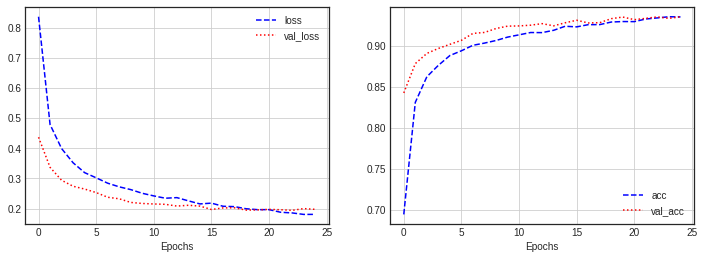

In [83]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_3.history['loss'],'b--',label='loss')
plt.plot(hist_3.history['val_loss'],'r:',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_3.history['acc'],'b--',label='acc')
plt.plot(hist_3.history['val_acc'],'r:',label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [84]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2171 - acc: 0.9264


[0.2170834243297577, 0.9264000058174133]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
image_generator = ImageDataGenerator(rotation_range=10,
                                      zoom_range=0.2,
                                      shear_range=0.6,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      horizontal_flip=True,
                                      vertical_flip=True)

In [87]:
augment_size = 200

In [88]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [89]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1,28,28,1),
                                  np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

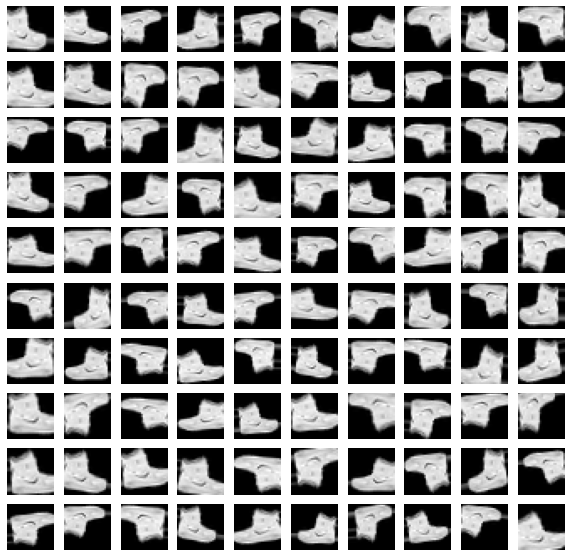

In [90]:
plt.figure(figsize=(10,10))
for i in range(1, 101):
  plt.subplot(10,10,i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap='gray')

데이터 추가

In [91]:
image_generator = ImageDataGenerator(rotation_range=15,
                                      zoom_range=0.1,
                                      shear_range=0.6,
                                      width_shift_range=0.15,
                                      height_shift_range=0.1,
                                      horizontal_flip=True,
                                      vertical_flip=False)

In [92]:
augment_size = 30000

In [93]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [95]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(120000, 28, 28, 1)
(120000,)


## 모델 학습 및 결과 시각화

In [96]:
model_4 = build_model3()
model_4.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 256)     

In [97]:
hist_4 = model_4.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
657/657 [==============================] - 8s 12ms/step - loss: 0.7978 - acc: 0.7090 - val_loss: 0.8477 - val_acc: 0.6871
Epoch 2/25
657/657 [==============================] - 7s 11ms/step - loss: 0.4917 - acc: 0.8256 - val_loss: 0.7393 - val_acc: 0.7319
Epoch 3/25
657/657 [==============================] - 7s 11ms/step - loss: 0.4246 - acc: 0.8502 - val_loss: 0.6447 - val_acc: 0.7673
Epoch 4/25
657/657 [==============================] - 7s 11ms/step - loss: 0.3833 - acc: 0.8645 - val_loss: 0.6410 - val_acc: 0.7688
Epoch 5/25
657/657 [==============================] - 7s 11ms/step - loss: 0.3595 - acc: 0.8732 - val_loss: 0.5973 - val_acc: 0.7893
Epoch 6/25
657/657 [==============================] - 7s 11ms/step - loss: 0.3395 - acc: 0.8797 - val_loss: 0.5926 - val_acc: 0.7930
Epoch 7/25
657/657 [==============================] - 7s 11ms/step - loss: 0.3238 - acc: 0.8853 - val_loss: 0.6085 - val_acc: 0.7798
Epoch 8/25
657/657 [==============================] - 7s 11ms/step - 

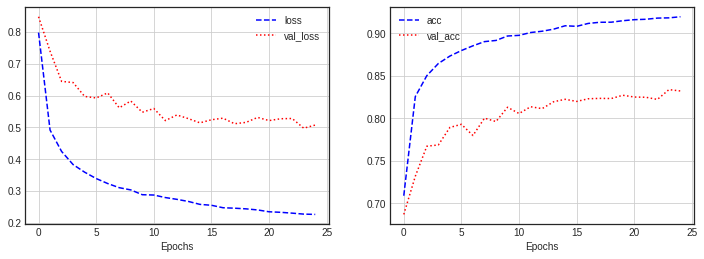

In [98]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_4.history['loss'],'b--',label='loss')
plt.plot(hist_4.history['val_loss'],'r:',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_4.history['acc'],'b--',label='acc')
plt.plot(hist_4.history['val_acc'],'r:',label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [99]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1952 - acc: 0.9301


[0.19521018862724304, 0.9301000237464905]